## Artist Performance Analysis ##

## Part 1: Cleaning the data
---------

The first part of our project is cleaning the "Popular_Spotify_Songs.csv" file for analysis and visualization purposses through the code


In [1]:
#Importing dependecies/libraries for analysis and maniplation purposes

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
# Defining the file path to find the data from "Popular_Spotify_Songs.csv" file
spotify_file = Path('Resources/Popular_Spotify_Songs.csv')

# Reading "Popular_Spotify_Songs.csv" file to pull in data to create a dataframe
top_streaming_platform_songs= pd.read_csv(spotify_file)

#Displaying all the data
top_streaming_platform_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
## Dropping the entire row of any "track_name" that has a specical character

is_readable = lambda x: all(ord(c) < 128 for c in str(x))

# Filter the DataFrame to drop rows with unreadable characters
cleaned_top_songs = top_streaming_platform_songs[top_streaming_platform_songs.map(is_readable).all(axis=1)]

cleaned_top_songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Overriding "cleaned_top_spotify_songs" dataframe with only columns that will be used for analysis and visualization 

cleaned_top_songs = cleaned_top_songs[['artist(s)_name', 'track_name', 'artist_count', 'released_year', 'released_month', 'released_day' , 'in_spotify_playlists', 'in_spotify_charts', 
                                        'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts','danceability_%','acousticness_%']]

#Displaying cleaned dataframe with
cleaned_top_songs

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,acousticness_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,80,31
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382,71,7
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949,51,17
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548,55,11
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,My Mind & Me,1,2022,11,3,953,0,91473363,61,13,37,1,0,60,57
949,Taylor Swift,Bigger Than The Whole Sky,1,2022,10,21,1180,0,121871870,4,0,8,0,0,42,83
950,"Feid, Paulo Londra",A Veces (feat. Feid),2,2022,11,3,573,0,73513683,2,0,7,0,0,80,4
951,"Feid, Sech, Jhayco",En La De Ella,3,2022,10,20,1320,0,133895612,29,26,17,0,0,82,8


----------
## Top Months to Release Songs
----------

In [5]:
import calendar

# Finding the months that have the most released song throughout years 1930 to 2023
month_most_released_songs_series = cleaned_top_songs['released_month'].value_counts()

month_num_list=[1,2,3,4,5,6,7,8,9,10,11,12]

#Empty List to append the names of each month instead of a numerical value for each month (Ex: 1=> Janurary)
month_name_list=[]

# Creating a dataframe from series "month_most_released_songs_series"
month_most_released_songs_df = pd.DataFrame(month_most_released_songs_series).sort_values('released_month')

# For loop to find each month in the 'month_num' list above
for month_num in month_num_list:

  # Appending the changed month name into the new list called "month_name"
  month_name_list.append(calendar.month_name[month_num])


# Creating a new dataframe "new_months" with month name and released song count
new_months_df = pd.DataFrame({'Months':month_name_list, 'Released Song Count':month_most_released_songs_df['count']})

# Resetting and dropping index to have a clean dataframe with "Months" as names instead of numbers and "Released Song Count" of each months for number of songs released in those months
new_months_df = new_months_df.reset_index(drop=True) 

#Displaying 'new_months' dataframe
new_months_df



,Months,Released Song Count
0,January,119
1,February,54
2,March,73
3,April,58
4,May,111
5,June,78
6,July,57
7,August,38
8,September,50
9,October,64


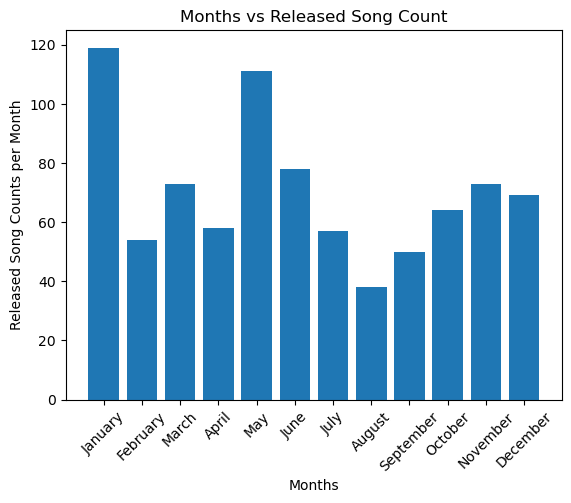

In [6]:
# Creating bar chart visualization for "Months" vs "Released Song Counts per Month"

#Defining x & y-axes for bar chart
x_axis = new_months_df['Months']
y_axis = new_months_df['Released Song Count']

# Creating bar chart for "Months" vs "Song Count per Month"
plt.bar(x_axis,y_axis)

# Making x-axis labels more visually appealing 
plt.xticks(rotation = 45)

#Defining x & y-axes labels and tilte for bar chart
plt.title('Months vs Released Song Count')
plt.xlabel('Months')
plt.ylabel('Released Song Counts per Month')

#Diplay Bar Graph-
plt.show()


## Months vs Song Count Analysis 
*  Based on the bar graph above that is referencing the month of a year vs released song count shows that January tends to be the most popular month for artists to release their new song. The second most popular month for artists to release their new songs is the month of May with all the other months being some what equal. The logical reasoning behind this is that artists want to release their news songs when people are in good moods and excited for the new upcoming year. May being the next most popular month for artists to release their new songs also makes sense because its the month that leads into summer and since the weather is getting warmer and people are outside more and hanging out with family and friends, they tend to listen to more music which would result in artists wanting to capitalize off this opportunity. 

----------
## Top Days to Release Songs
----------

In [7]:
# Finding the days of the month that have the most released song

# Finding the days that have the most released song throughout years 1930 to 2023
days_most_released_songs_series = cleaned_top_songs['released_day'].value_counts()

# Creating a dataframe from series "days_most_released_songs_series"
days_most_released_songs_df = pd.DataFrame(days_most_released_songs_series).sort_values('released_day')

# Creating a new dataframe "new_days_df" with the day in a month and released song count
new_days_df = pd.DataFrame({'Days':days_most_released_songs_df.index, 'Released Song Count':days_most_released_songs_df['count']})

# Resetting and dropping index to have a clean dataframe with "Days" as names instead of numbers and "Song Count" of each day for number of songs released throughout a month
new_days_df = new_days_df.reset_index(drop=True)

# Displaying 'new_days_df' dataframe
new_days_df.head()

,Days,Released Song Count
0,1,87
1,2,37
2,3,27
3,4,36
4,5,24


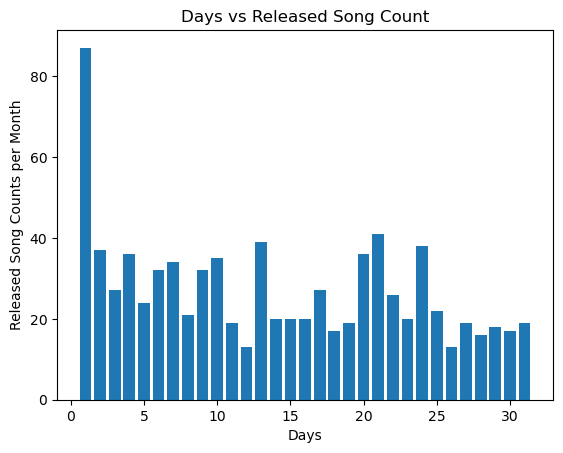

In [8]:
# Creating bar chart visualization for "Day" vs "Released Song Counts per Day"

#Defining x & y-axes for bar chart
x_axis = new_days_df['Days']
y_axis = new_days_df['Released Song Count']

# Creating bar chart for "Months" vs "Song Count per Month"
plt.bar(x_axis,y_axis)

#Defining x & y-axes labels and tilte for bar chart
plt.title('Days vs Released Song Count')
plt.xlabel('Days')
plt.ylabel('Released Song Counts per Month')

#Diplay Bar Graph-
plt.show()


## Days vs Song Count Analysis 
* Based on the bar graph above that is referencing the days in a month vs released song count. The graph shows that the vast majority of artists tend to release their new songs on the 1st of every month (87 songs). The logical reasoning behind this could be that artists want to build anticipation for their upcoming albums or projects that they will be releasing later in the month. The second most popular day for artist to release their new songs is the 21st of the month but as you can see from the bar chart, there is not a major difference between releasing a new song on any other day besides the 1st of the month which seems to have the most success for all artists regardless of who they are. 

----------
## Performance of Collaborating vs Solo Artists
----------

In [9]:
# Dataframe of songs that were created just by an individual artist
solo_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] <= 1]
solo_artists_df

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,acousticness_%
1,Myke Towers,LALA,1,2023,3,23,1474,48,133716286,48,126,58,14,382,71,7
2,Olivia Rodrigo,vampire,1,2023,6,30,1397,113,140003974,94,207,91,14,949,51,17
3,Taylor Swift,Cruel Summer,1,2019,8,23,7858,100,800840817,116,207,125,12,548,55,11
4,Bad Bunny,WHERE SHE GOES,1,2023,5,18,3133,50,303236322,84,133,87,15,425,65,14
7,Quevedo,Columbia,1,2023,7,7,714,43,58149378,25,89,30,13,194,67,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,Drake,BackOutsideBoyz,1,2022,11,4,1045,0,93367537,8,5,2,0,0,85,4
947,Taylor Swift,The Great War,1,2022,10,21,1274,0,181382590,1,6,11,0,0,57,22
948,Selena Gomez,My Mind & Me,1,2022,11,3,953,0,91473363,61,13,37,1,0,60,57
949,Taylor Swift,Bigger Than The Whole Sky,1,2022,10,21,1180,0,121871870,4,0,8,0,0,42,83


In [10]:
# Dataframe of songs that were created as collobrations from 2 or more artists
collab_artists_df = cleaned_top_songs[cleaned_top_songs['artist_count'] > 1]
collab_artists_df.head()

,artist(s)_name,track_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,acousticness_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2,2023,7,14,553,147,141381703,43,263,45,10,826,80,31
5,"Dave, Central Cee",Sprinter,2,2023,6,1,2186,91,183706234,67,213,88,17,946,92,19
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,2,2023,3,16,3090,50,725980112,34,222,43,13,418,67,48
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,2,2023,3,17,2953,44,553634067,49,110,66,13,339,81,21
10,"Bad Bunny, Grupo Frontera",un x100to,2,2023,4,17,2876,40,505671438,41,205,54,12,251,57,23


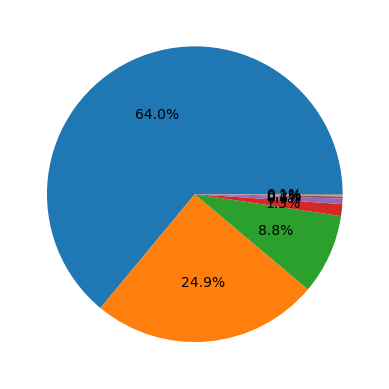

In [11]:
# Creating visualization for Number of Solo Artists vs Collaborting Artists (1-8)

# x_axis= solo_artists_df['artist_count'].count()
# y_axis=collab_artists_df['artist_count'].count()

#string_list = [str(element) for element in my_list]

labels = str(cleaned_top_songs['artist_count'].unique())

x = cleaned_top_songs['artist_count'].value_counts()


plt.pie(x, autopct="%1.1f%%") #labels = labels - wont work - figure out why

plt.show()


----------
## Correlation of Shamzam Charts vs Total Streams
----------

In [12]:
# Creating a smaller dataframe called "shazam_vs_streams_df" with only the columns need for statstical analysis calculations
shazam_vs_streams_df = cleaned_top_songs[['artist(s)_name', 'track_name','streams','in_shazam_charts']]
shazam_vs_streams_df

,artist(s)_name,track_name,streams,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141381703,826
1,Myke Towers,LALA,133716286,382
2,Olivia Rodrigo,vampire,140003974,949
3,Taylor Swift,Cruel Summer,800840817,548
4,Bad Bunny,WHERE SHE GOES,303236322,425
...,...,...,...,...
948,Selena Gomez,My Mind & Me,91473363,0
949,Taylor Swift,Bigger Than The Whole Sky,121871870,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),73513683,0
951,"Feid, Sech, Jhayco",En La De Ella,133895612,0


In [13]:
# Dropping nulls values and unnesscary values from both "streams" & "in_shazam_charts" columns

# Changing value format in column "in_shazam_charts" to not include a common "," for thousands (Ex: 1,000 => 1000)
shazam_vs_streams_df.loc[:,'in_shazam_charts'] = shazam_vs_streams_df.loc[:,'in_shazam_charts'].str.replace(',', '')

# Filling all blank values in dataframe with "NAN"
shazam_vs_streams_df = shazam_vs_streams_df.fillna("NAN")

# Droping entire row that has value "BPM110Key......" in column "streams" since its not a numerical total stream value
shazam_vs_streams_df = shazam_vs_streams_df.query('streams != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"')

# Dropping all rows with null/"NAN" values from column "in_shazam_charts"
shazam_vs_streams_df = shazam_vs_streams_df.query('in_shazam_charts != "NAN"')

# Dropping any other null values that might be left in the dataframe "shazam_vs_streams_df" to allow for statistical analysis
shazam_vs_streams_df.dropna()

,artist(s)_name,track_name,streams,in_shazam_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141381703,826
1,Myke Towers,LALA,133716286,382
2,Olivia Rodrigo,vampire,140003974,949
3,Taylor Swift,Cruel Summer,800840817,548
4,Bad Bunny,WHERE SHE GOES,303236322,425
...,...,...,...,...
948,Selena Gomez,My Mind & Me,91473363,0
949,Taylor Swift,Bigger Than The Whole Sky,121871870,0
950,"Feid, Paulo Londra",A Veces (feat. Feid),73513683,0
951,"Feid, Sech, Jhayco",En La De Ella,133895612,0


The correlation between the number of times a song appears in Shazam Charts vs a songs Total Streams is 0.00037


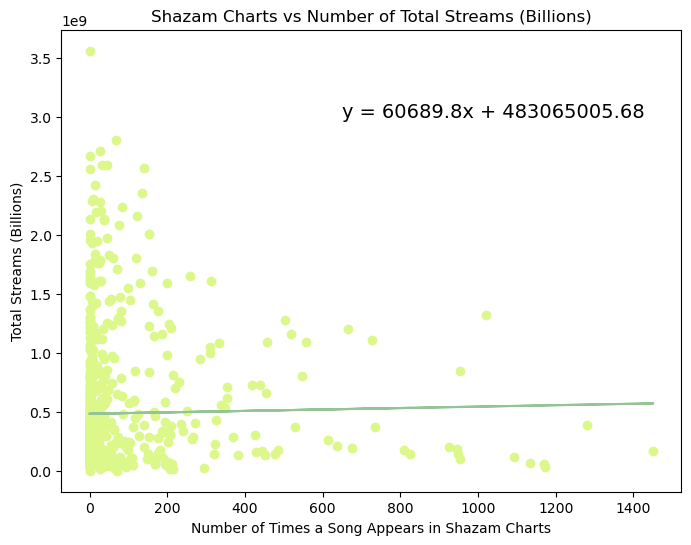

In [14]:
# Creating a scatter plot to show the Correlation between Number of Times a Song is on Shazam Charts vs Total Streams of that song

# Importing dependcies for linear regression calculations
from scipy.stats import linregress

# Converting values in "streams" & "in_shazam_charts" columns into "NUMERIC values" instead of "objects"
shazam_vs_streams_df['streams'] = pd.to_numeric(shazam_vs_streams_df['streams'])
shazam_vs_streams_df['in_shazam_charts'] = pd.to_numeric(shazam_vs_streams_df['in_shazam_charts'])
                                             
# Defining x & y values for scatter plot and linear regression line
x_values = shazam_vs_streams_df['in_shazam_charts']
y_values = shazam_vs_streams_df['streams']

# Defining linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
# Creating Regression Line
regress_values = x_values * slope + intercept 

# Reassigning rvalue to varable called "correlation for easier comprehension => Rounding it to the nearest hundredths decimal place
correlation = round((rvalue**2),5)

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c='#DCF78A')

# Creating a string value of Linear Regression Line to plot on graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting regression line on Scatter Plot
plt.plot(x_values,regress_values, color='#94C396') 

# Plotting the Equation Line on Scatter Plot for easier analysis
plt.annotate(line_eq,(650,3000000000),fontsize=14,color='black')

#Labeling x & y axis
plt.title('Shazam Charts vs Number of Total Streams (Billions)')
plt.xlabel('Number of Times a Song Appears in Shazam Charts')
plt.ylabel('Total Streams (Billions)')

# Printing out a sentence above displayed graph for easier comprehension
print(f"The correlation between the number of times a song appears in Shazam Charts vs a songs Total Streams is {correlation}")

plt.show()


## Months vs Song Count Analysis 
* The linear regression line plotted above on the scatter plot showing the linear relationship between the number of times a song appears in shazam charts vs a songs total streams has a very weak positive correlation of 0.000372903831085. This implies that there is no assocation between a songs performance based on how many times that song makes a shazam chart vs that songs total number of streams on Spotify. The reason behind this could be that although people tend to correlate that the more times someone shazams a specific song to find out the name and artist of that song to save it to a playlist or just remeber it to play it at a later time in the future. Everyone has different tastes in music and just because a song may have been "shazamed" more times then other songs, there is no reason to believe that that song is more popular than others based on the statistical analysis. 

----------
## Songs that made the most charts (Maybe just spotify) vs Total Streams
----------

----------
## Correlation / Scatter Plot of Danceability Score vs Total Streams
----------